In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # statistical data visualization
import matplotlib.pyplot as plt # plot bib
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


#dados = pd.read_csv(r'../input/house-prices-advanced-regression-techniques/data_description.txt',sep=';')

#dados =pd.read_csv(r'../input/house-prices-advanced-regression-techniques/sample_submission.csv')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### To open and show  the file data_description.txt in pandas

In [2]:
#with open('../input/house-prices-advanced-regression-techniques/data_description.txt') as f:
#    contents = f.read()
#    print(contents)
#dados =  open('../input/house-prices-advanced-regression-techniques/data_description.txt', 'r')


Fazer base inicial e fazer side test com a regressao dos resultados iniciais 

### Setando o tamanho dos gráficos a serem plotados

In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
pd.set_option('display.max_columns',82)

### Abrindo os arquivos necessários

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_sale = pd.read_csv('sample_submission.csv')
print(train.shape, test.shape)

(1460, 81) (1459, 80)


### Juntando os arquivos, mais tarde será feito uma separação randomica 90%-10%  para treino e teste, esse método simplifica no futuro ter que tratar o test, porém impede que seja apenas adicionado qualquer teste e verificado.


#train = test.append(train) 
### a idéia de juntar os dataframes era interessante, porém a base test não possui nenhum valor de Sale Price, o que torna inviável neste caso e será necessário ajustar as duas bases de dados

### Printando o arquivo train

In [5]:
train


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

### Colocando as colunas do nosso dataframe em ordem alfabetica

In [6]:
train = train.reindex(sorted(train.columns), axis=1)
train

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706,0,GLQ,Unf,1,0,Gd,150,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548,2,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500,WD,0,Pave,8,856,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978,0,ALQ,Unf,0,1,Gd,284,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460,2,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500,WD,0,Pave,6,1262,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486,0,GLQ,Unf,1,0,Gd,434,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608,2,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500,WD,0,Pave,6,920,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216,0,ALQ,Unf,1,0,TA,540,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642,3,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000,WD,0,Pave,7,756,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655,0,GLQ,Unf,1,0,Gd,490,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836,3,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,250000,WD,0,Pave,9,1145,AllPub,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,0,NaN,3,1Fam,TA,No,0,0,Unf,Unf,0,0,Gd,953,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,460,2,TA,RFn,TA,Attchd,1999.0,1647,1,GasA,Ex,2Story,1456,1,TA,Lvl,Gtl,7917,Inside,62.0,Reg,0,60,RL,0.0,None,NaN,0,8,Gilbert,40,5,6,Y,0,NaN,CompShg,Gable,Normal,175000,WD,0,Pave,7,953,AllPub,0,1999,2000,2007
1456,2073,0,0,NaN,3,1Fam,TA,No,790,163,ALQ,Rec,1,0,Gd,589,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,MnPrv,TA,2,CBlock,2,Min1,500,2,TA,Unf,TA,Attchd,1978.0,2073,0,GasA,TA,1Story,1457,1,TA,Lvl,Gtl,13175,Inside,85.0,Reg,0,20,RL,119.0,Stone,NaN,0,2,NWAmes,0,6,6,Y,0,NaN,CompShg,Gable,Normal,210000,WD,0,Pave,7,1542,AllPub,349,1978,1988,2010
1457,1188,1152,0,NaN,4,1Fam,Gd,No,275,0,GLQ,Unf,0,0,TA,877,Y,Norm,Norm,SBrkr,0,Gd,Ex,CemntBd,CmentBd,GdPrv,Gd,2,Stone,2,Typ,252,1,TA,RFn,TA,Attchd,1941.0,2340,0,GasA,Ex,2Story,1458,1,Gd,Lvl,Gtl,9042,Inside,66.0,Reg,0,70,RL,0.0,None,Shed,2500,5,Crawfor,60,9,7,Y,0,NaN,CompShg,Gable,Normal,266500,WD,0,Pave,9,1152,AllPub,0,1941,2006,2010
1458,1078,0,0,NaN,2,1Fam,TA,Mn,49,1029,GLQ,Rec,1,0,TA,0,Y,Norm,Norm,FuseA,112,TA,TA,MetalSd,MetalSd,NaN,NaN,0,CBlock,1,Typ,240,1,TA,Unf,TA,Attchd,1950.0,1078,0,GasA,Gd,1Story,1459,1,Gd,Lvl

### Abrindo o train com describe que gera valores estatisticos

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.00,0.0,728.00,2065.0
3SsnPorch,1460.0,3.409589,29.317331,0.0,0.00,0.0,0.00,508.0
BedroomAbvGr,1460.0,2.866438,0.815778,0.0,2.00,3.0,3.00,8.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtFullBath,1460.0,0.425342,0.518911,0.0,0.00,0.0,1.00,3.0
BsmtHalfBath,1460.0,0.057534,0.238753,0.0,0.00,0.0,0.00,2.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
EnclosedPorch,1460.0,21.954110,61.119149,0.0,0.00,0.0,0.00,552.0


### Criando uma correlação de gráficos do dataframe train

In [8]:
#sns.pairplot(train)b

### Verificando quantos valores nulos o train possui

### Correlacionando todos os dados do Train segundo o coeficiente de correlação de Pearson e deixando visivel em um mapa de calor

<AxesSubplot:>

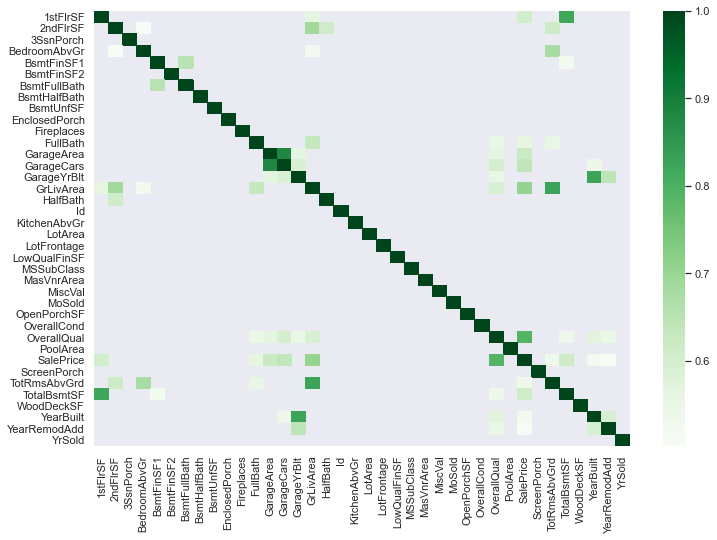

In [9]:
corr = train.corr()

kot = corr[((corr>=.5) | (corr <= -.5))]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

### Criando um dataFrame somente com as correlações superiores a |0.001| 

In [10]:
#plt.subplots(figsize=(50,50))
correlacao = train.corr() 
correlacao_media = correlacao[((correlacao >= .0001) | (correlacao <= -.0001)) & (correlacao !=1.000)] # colocando parametro entr .5 e -.5 e menor que 1 na correlacao
c0 = correlacao_media.unstack().sort_values(ascending = True).drop_duplicates() # transforamndo em series, colocando vlaores em ordem e retirando duplicatas
c0 = c0.to_frame() # transformando series em dataframe
c0 = c0.reset_index().rename(columns = {'level_0':'coluna1','level_1':'coluna2',0:'dados_correlacionados'}) # desnormaliza o dado ( cria as colunas necessarias) e renomeia
c0 = c0[(c0['coluna1'] == 'SalePrice') | (c0['coluna2'] == 'SalePrice')] # Pega a coluna 1 ou a 2 onde tem sale price e tira as que não possui
c0 = c0.reset_index(drop=True) # reseta novamente o index, fazendo com que os valores estejam ordenados (1,2,3,4...), e o drop = True retira a coluna index
c0

,coluna1,coluna2,dados_correlacionados
0,SalePrice,KitchenAbvGr,-0.135907
1,EnclosedPorch,SalePrice,-0.128578
2,MSSubClass,SalePrice,-0.084284
3,SalePrice,OverallCond,-0.077856
4,YrSold,SalePrice,-0.028923
5,LowQualFinSF,SalePrice,-0.025606
6,SalePrice,Id,-0.021917
7,MiscVal,SalePrice,-0.021190
8,BsmtHalfBath,SalePrice,-0.016844
9,SalePrice,BsmtFinSF2,-0.011378


### Passando todos os parâmetros SalePrice para a mesma coluna de forma a deixar nosso dataframe mais visual

In [11]:
def transformata(dataframe): # definindo uma funcao nova para pegar a string SalePrice da coluna2 e jogar na coluna1, e vice versa
    if dataframe['coluna2']== 'SalePrice': 
        a = dataframe['coluna1']
        dataframe['coluna1'] = dataframe['coluna2']
        dataframe['coluna2'] = a
        
        dataframe['dados_correlacionados'] *= -1 # como o dado é correlacionado e invertemos a correlação, precisamos inverter o valor do dado
    return dataframe
c1 = c0.apply(transformata,axis=1) # aplicado para varios dataframes, por exemplo aplicar nas colunas (axis=1)
c1

,coluna1,coluna2,dados_correlacionados
0,SalePrice,KitchenAbvGr,-0.135907
1,SalePrice,EnclosedPorch,0.128578
2,SalePrice,MSSubClass,0.084284
3,SalePrice,OverallCond,-0.077856
4,SalePrice,YrSold,0.028923
5,SalePrice,LowQualFinSF,0.025606
6,SalePrice,Id,-0.021917
7,SalePrice,MiscVal,0.021190
8,SalePrice,BsmtHalfBath,0.016844
9,SalePrice,BsmtFinSF2,-0.011378


### Excluindo as colunas que não possuem correlação nenhuma como preço pois estão em string e deverão ser tratadas mais tarde: 

In [12]:
colunas_escolhidas = c1['coluna2'].values
excluido_train = train.drop(colunas_escolhidas,axis=1)
excluido_train

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,Street,Utilities
0,NaN,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,NaN,NaN,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,Reg,RL,BrkFace,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,208500,WD,Pave,AllPub
1,NaN,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,SBrkr,TA,TA,MetalSd,MetalSd,NaN,TA,CBlock,Typ,TA,RFn,TA,Attchd,GasA,Ex,1Story,TA,Lvl,Gtl,FR2,Reg,RL,None,NaN,Veenker,Y,NaN,CompShg,Gable,Normal,181500,WD,Pave,AllPub
2,NaN,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,NaN,TA,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,IR1,RL,BrkFace,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,223500,WD,Pave,AllPub
3,NaN,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,SBrkr,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,BrkTil,Typ,TA,Unf,TA,Detchd,GasA,Gd,2Story,Gd,Lvl,Gtl,Corner,IR1,RL,None,NaN,Crawfor,Y,NaN,CompShg,Gable,Abnorml,140000,WD,Pave,AllPub
4,NaN,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,NaN,TA,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,FR2,IR1,RL,BrkFace,NaN,NoRidge,Y,NaN,CompShg,Gable,Normal,250000,WD,Pave,AllPub
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,1Fam,TA,No,Unf,Unf,Gd,Y,Norm,Norm,SBrkr,TA,TA,VinylSd,VinylSd,NaN,TA,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,TA,Lvl,Gtl,Inside,Reg,RL,None,NaN,Gilbert,Y,NaN,CompShg,Gable,Normal,175000,WD,Pave,AllPub
1456,NaN,1Fam,TA,No,ALQ,Rec,Gd,Y,Norm,Norm,SBrkr,TA,TA,Plywood,Plywood,MnPrv,TA,CBlock,Min1,TA,Unf,TA,Attchd,GasA,TA,1Story,TA,Lvl,Gtl,Inside,Reg,RL,Stone,NaN,NWAmes,Y,NaN,CompShg,Gable,Normal,210000,WD,Pave,AllPub
1457,NaN,1Fam,Gd,No,GLQ,Unf,TA,Y,Norm,Norm,SBrkr,Gd,Ex,CemntBd,CmentBd,GdPrv,Gd,Stone,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,Reg,RL,None,Shed,Crawfor,Y,NaN,CompShg,Gable,Normal,266500,WD,Pave,AllPub
1458,NaN,1Fam,TA,Mn,GLQ,Rec,TA,Y,Norm,Norm,FuseA,TA,TA,MetalSd,MetalSd,NaN,NaN,CBlock,Typ,TA,Unf,TA,Attchd,GasA,Gd,1Story,Gd,Lvl,Gtl,Inside,Reg,RL,None,NaN,NAmes,Y,NaN,CompShg,Hip,Normal,142125,WD,Pave,AllPub


### Criando um novo_train apenas com as colunas numéricas

In [13]:
#for i, colunas in enumerate(train):
   # print(colunas)
    #if colunas == c1['coluna2']:
        #train.remove(colunas)
       # print(i)

    
copiandosale = train[['SalePrice']].copy()   #copia os valores da coluna SalePrice do dataframe train
colunas_escolhidas = c1['coluna2'].values #copia os nomes de coluna2
novo_train = train[colunas_escolhidas] # novo_train sera o novo dataframe no qual possui as colunas equivalentes aos itens da coluna2 de c1
novo_train['SalePrice'] = copiandosale # adiciona a coluna SalePrice no novo dataframe
novo_train = novo_train.reindex(sorted(novo_train.columns), axis=1)
novo_train
#print(len(colunas_train)) printa o tamanho da colunas_train


<ipython-input-13-3ea528b3bad3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novo_train['SalePrice'] = copiandosale # adiciona a coluna SalePrice no novo dataframe


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,706,0,1,0,150,0,0,2,548,2,2003.0,1710,1,1,1,8450,65.0,0,60,196.0,0,2,61,5,7,0,208500,0,8,856,0,2003,2003,2008
1,1262,0,0,3,978,0,0,1,284,0,1,2,460,2,1976.0,1262,0,2,1,9600,80.0,0,20,0.0,0,5,0,8,6,0,181500,0,6,1262,298,1976,1976,2007
2,920,866,0,3,486,0,1,0,434,0,1,2,608,2,2001.0,1786,1,3,1,11250,68.0,0,60,162.0,0,9,42,5,7,0,223500,0,6,920,0,2001,2002,2008
3,961,756,0,3,216,0,1,0,540,272,1,1,642,3,1998.0,1717,0,4,1,9550,60.0,0,70,0.0,0,2,35,5,7,0,140000,0,7,756,0,1915,1970,2006
4,1145,1053,0,4,655,0,1,0,490,0,1,2,836,3,2000.0,2198,1,5,1,14260,84.0,0,60,350.0,0,12,84,5,8,0,250000,0,9,1145,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,0,3,0,0,0,0,953,0,1,2,460,2,1999.0,1647,1,1456,1,7917,62.0,0,60,0.0,0,8,40,5,6,0,175000,0,7,953,0,1999,2000,2007
1456,2073,0,0,3,790,163,1,0,589,0,2,2,500,2,1978.0,2073,0,1457,1,13175,85.0,0,20,119.0,0,2,0,6,6,0,210000,0,7,1542,349,1978,1988,2010
1457,1188,1152,0,4,275,0,0,0,877,0,2,2,252,1,1941.0,2340,0,1458,1,9042,66.0,0,70,0.0,2500,5,60,9,7,0,266500,0,9,1152,0,1941,2006,2010
1458,1078,0,0,2,49,1029,1,0,0,112,0,1,240,1,1950.0,1078,0,1459,1,9717,68.0,0,20,0.0,0,4,0,6,5,0,142125,0,5,1078,366,1950,1996,2010


In [14]:
test_sale

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [15]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

tentando base inicial regressao teste


In [16]:
def avaliar_modelo(nome_modelo, y_teste, previsao):
    r2 = r2_score(y_teste, previsao)
    RSME = np.sqrt(mean_squared_error(y_teste, previsao))
    return f'Modelo {nome_modelo}:\nR²:{r2:.2%}\nRSME:{RSME:.2f}'

In [17]:
base_testes = novo_train

In [18]:
base_testes = base_testes.dropna()

In [19]:
modelo_rf = RandomForestRegressor()
modelo_lr = LinearRegression()
modelo_et = ExtraTreesRegressor()

modelos = {'RandomForest': modelo_rf,
          'LinearRegression': modelo_lr,
          'ExtraTrees': modelo_et,
          }
          
y = base_testes['SalePrice']
X = base_testes.drop('SalePrice', axis=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(X_train, y_train)
    #testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))

Modelo RandomForest:
R²:87.60%
RSME:30509.32
Modelo LinearRegression:
R²:82.61%
RSME:36128.71
Modelo ExtraTrees:
R²:87.63%
RSME:30471.00


In [21]:
### Transformando coluna de área construida de ft2 para m2
#def pes2_para_metros2(x): # definindo uma funcao nova para pegar a colunar GrLivArea do novo_df e transformando de ft2 para m2
    #m2 = x/10.764
    #return m2
#novo_df.apply(pes2_para_metros2,axis=1) # aplicado para varios dataframes, por exemplo aplicar nas colunas
#novo_df['GrlivAreaM2'] = novo_df['GrLivArea'].apply(pes2_para_metros2)
#novo_df

### Verificando quantos valores nulos as colunas do novo_train possui

In [22]:
novo_train.isnull().sum()

1stFlrSF           0
2ndFlrSF           0
3SsnPorch          0
BedroomAbvGr       0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtFullBath       0
BsmtHalfBath       0
BsmtUnfSF          0
EnclosedPorch      0
Fireplaces         0
FullBath           0
GarageArea         0
GarageCars         0
GarageYrBlt       81
GrLivArea          0
HalfBath           0
Id                 0
KitchenAbvGr       0
LotArea            0
LotFrontage      259
LowQualFinSF       0
MSSubClass         0
MasVnrArea         8
MiscVal            0
MoSold             0
OpenPorchSF        0
OverallCond        0
OverallQual        0
PoolArea           0
SalePrice          0
ScreenPorch        0
TotRmsAbvGrd       0
TotalBsmtSF        0
WoodDeckSF         0
YearBuilt          0
YearRemodAdd       0
YrSold             0
dtype: int64

### Transformando dados em T/F a partir de 0 e 1

In [23]:
colunas_zeroum = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch','Fireplaces' ]
novo_train_cod = novo_train.copy()
for coluna in colunas_zeroum:
    novo_train_cod.loc[novo_train_cod[coluna]!=0, coluna] = 1
    novo_train_cod.loc[novo_train_cod[coluna]==0, coluna] = 0

novo_train_cod

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,706,0,1,0,150,0,0,2,548,2,2003.0,1710,1,1,1,8450,65.0,0,60,196.0,0,2,1,5,7,0,208500,0,8,856,0,2003,2003,2008
1,1262,0,0,3,978,0,0,1,284,0,1,2,460,2,1976.0,1262,0,2,1,9600,80.0,0,20,0.0,0,5,0,8,6,0,181500,0,6,1262,298,1976,1976,2007
2,920,866,0,3,486,0,1,0,434,0,1,2,608,2,2001.0,1786,1,3,1,11250,68.0,0,60,162.0,0,9,1,5,7,0,223500,0,6,920,0,2001,2002,2008
3,961,756,0,3,216,0,1,0,540,1,1,1,642,3,1998.0,1717,0,4,1,9550,60.0,0,70,0.0,0,2,1,5,7,0,140000,0,7,756,0,1915,1970,2006
4,1145,1053,0,4,655,0,1,0,490,0,1,2,836,3,2000.0,2198,1,5,1,14260,84.0,0,60,350.0,0,12,1,5,8,0,250000,0,9,1145,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,0,3,0,0,0,0,953,0,1,2,460,2,1999.0,1647,1,1456,1,7917,62.0,0,60,0.0,0,8,1,5,6,0,175000,0,7,953,0,1999,2000,2007
1456,2073,0,0,3,790,163,1,0,589,0,1,2,500,2,1978.0,2073,0,1457,1,13175,85.0,0,20,119.0,0,2,0,6,6,0,210000,0,7,1542,349,1978,1988,2010
1457,1188,1152,0,4,275,0,0,0,877,0,1,2,252,1,1941.0,2340,0,1458,1,9042,66.0,0,70,0.0,2500,5,1,9,7,0,266500,0,9,1152,0,1941,2006,2010
1458,1078,0,0,2,49,1029,1,0,0,1,0,1,240,1,1950.0,1078,0,1459,1,9717,68.0,0,20,0.0,0,4,0,6,5,0,142125,0,5,1078,366,1950,1996,2010


### Criando a função verificar t/f das varandas (porch)

In [24]:
def verificar_t_f_porch(dataframe):
    return dataframe['OpenPorchSF'] or dataframe['EnclosedPorch'] or dataframe['3SsnPorch'] or dataframe['EnclosedPorch']

    

### adicionando os valores T/F em uma variavel Porch

In [25]:
novo_train_cod_cop = novo_train_cod.copy()

novo_train_cod_cop['Porch'] = novo_train_cod_cop.apply(verificar_t_f_porch, axis=1)
novo_train_cod_cop['Porch'] = novo_train_cod_cop['Porch'].astype(int)
novo_train_cod_cop

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Porch
0,856,854,0,3,706,0,1,0,150,0,0,2,548,2,2003.0,1710,1,1,1,8450,65.0,0,60,196.0,0,2,1,5,7,0,208500,0,8,856,0,2003,2003,2008,1
1,1262,0,0,3,978,0,0,1,284,0,1,2,460,2,1976.0,1262,0,2,1,9600,80.0,0,20,0.0,0,5,0,8,6,0,181500,0,6,1262,298,1976,1976,2007,0
2,920,866,0,3,486,0,1,0,434,0,1,2,608,2,2001.0,1786,1,3,1,11250,68.0,0,60,162.0,0,9,1,5,7,0,223500,0,6,920,0,2001,2002,2008,1
3,961,756,0,3,216,0,1,0,540,1,1,1,642,3,1998.0,1717,0,4,1,9550,60.0,0,70,0.0,0,2,1,5,7,0,140000,0,7,756,0,1915,1970,2006,1
4,1145,1053,0,4,655,0,1,0,490,0,1,2,836,3,2000.0,2198,1,5,1,14260,84.0,0,60,350.0,0,12,1,5,8,0,250000,0,9,1145,192,2000,2000,2008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,0,3,0,0,0,0,953,0,1,2,460,2,1999.0,1647,1,1456,1,7917,62.0,0,60,0.0,0,8,1,5,6,0,175000,0,7,953,0,1999,2000,2007,1
1456,2073,0,0,3,790,163,1,0,589,0,1,2,500,2,1978.0,2073,0,1457,1,13175,85.0,0,20,119.0,0,2,0,6,6,0,210000,0,7,1542,349,1978,1988,2010,0
1457,1188,1152,0,4,275,0,0,0,877,0,1,2,252,1,1941.0,2340,0,1458,1,9042,66.0,0,70,0.0,2500,5,1,9,7,0,266500,0,9,1152,0,1941,2006,2010,1
1458,1078,0,0,2,49,1029,1,0,0,1,0,1,240,1,1950.0,1078,0,1459,1,9717,68.0,0,20,0.0,0,4,0,6,5,0,142125,0,5,1078,366,1950,1996,2010,1


### Verificando os valores de Falsos de Porch

In [26]:
mostrar_porch = (novo_train_cod_cop['Porch'] ==0).sum(axis=0)
mostrar_porch

505

### Removendo agora as colunas desnecessárias de Porch (varanda)

In [27]:
novo_train_cod_cop = novo_train_cod_cop.drop(['OpenPorchSF','EnclosedPorch', '3SsnPorch','EnclosedPorch', 'Id', 'GarageArea'],axis=1)


In [28]:
novo_train_cod_cop

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,Fireplaces,FullBath,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Porch
0,856,854,3,706,0,1,0,150,0,2,2,2003.0,1710,1,1,8450,65.0,0,60,196.0,0,2,5,7,0,208500,0,8,856,0,2003,2003,2008,1
1,1262,0,3,978,0,0,1,284,1,2,2,1976.0,1262,0,1,9600,80.0,0,20,0.0,0,5,8,6,0,181500,0,6,1262,298,1976,1976,2007,0
2,920,866,3,486,0,1,0,434,1,2,2,2001.0,1786,1,1,11250,68.0,0,60,162.0,0,9,5,7,0,223500,0,6,920,0,2001,2002,2008,1
3,961,756,3,216,0,1,0,540,1,1,3,1998.0,1717,0,1,9550,60.0,0,70,0.0,0,2,5,7,0,140000,0,7,756,0,1915,1970,2006,1
4,1145,1053,4,655,0,1,0,490,1,2,3,2000.0,2198,1,1,14260,84.0,0,60,350.0,0,12,5,8,0,250000,0,9,1145,192,2000,2000,2008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,3,0,0,0,0,953,1,2,2,1999.0,1647,1,1,7917,62.0,0,60,0.0,0,8,5,6,0,175000,0,7,953,0,1999,2000,2007,1
1456,2073,0,3,790,163,1,0,589,1,2,2,1978.0,2073,0,1,13175,85.0,0,20,119.0,0,2,6,6,0,210000,0,7,1542,349,1978,1988,2010,0
1457,1188,1152,4,275,0,0,0,877,1,2,1,1941.0,2340,0,1,9042,66.0,0,70,0.0,2500,5,9,7,0,266500,0,9,1152,0,1941,2006,2010,1
1458,1078,0,2,49,1029,1,0,0,0,1,1,1950.0,1078,0,1,9717,68.0,0,20,0.0,0,4,6,5,0,142125,0,5,1078,366,1950,1996,2010,1


### Verificando quantos valores 0 possuem as colunas do novo_train_cod_cop

In [29]:
coluna_zeros = (novo_train_cod_cop == 0).sum(axis=0)
coluna_zero_df = coluna_zeros.to_frame().reset_index().rename(columns = {'index':'tipos', 0:'valores'})
coluna_zero_df

,tipos,valores
0,1stFlrSF,0
1,2ndFlrSF,829
2,BedroomAbvGr,6
3,BsmtFinSF1,467
4,BsmtFinSF2,1293
5,BsmtFullBath,856
6,BsmtHalfBath,1378
7,BsmtUnfSF,118
8,Fireplaces,690
9,FullBath,9


### A linha a baixo utiliza os valores entre 0 e 290 como booleanos para criar uma situação True or False no qual ao final quero somente os valores False dentro da coluna_zero_df e por fim chamo um outro dataframe para assumir essas novas colunas

### Até poderiamos remover todas as colunas que possuem muitos valores 0 com a seguinte linha de código:

#novo_train2 = novo_train.drop(remover_coluna_zero2['tipos'],axis=1)
#novo_train2

Porém antes de remover devemos pensar se não vale a pena colocar um statement T/F
Vale lembrar que isso não se aplica com valores que possuirem muitos 0, ai vai de cada um o quanto deseja analisar os dados


### Criando Colunas com apenas com as colunas com range acima do desejado em destaque

In [30]:
coluna_zeros2 = (novo_train_cod_cop == 0).sum(axis=0)
coluna_zero_df2 = coluna_zeros2.to_frame().reset_index().rename(columns = {'index':'tipos', 0:'valores'})
coluna_zero_df2

remover_coluna_zero2 = coluna_zero_df2[coluna_zero_df2['valores'].between(0, 290, inclusive=True) == False] #valores fora do range serão considerados false e somente essas colunas serão printadas

remover_coluna_zero2.sort_values(by=['valores'],ascending=False) # mostrará as colunas em ordem dos valores


,tipos,valores
24,PoolArea,1453
17,LowQualFinSF,1434
20,MiscVal,1408
6,BsmtHalfBath,1378
26,ScreenPorch,1344
4,BsmtFinSF2,1293
13,HalfBath,913
19,MasVnrArea,861
5,BsmtFullBath,856
1,2ndFlrSF,829


### Precisamos agora eliminar as colunas que possuem muitos valores 0, pois podem acabar por prejudicar nosso modelo, pensando na regra de pareto iremos remover toda coluna que possuir mais 0 do que 20% do valor total, ou seja 290.

### Vale lembrar que fizemos tratamento para o Porch e o Fireplaces, ou seja eles são tabelas True/False agora e por isso iremos manter apenas estas colunas que possuem mais zeros


In [31]:
novo_train2 = novo_train_cod_cop.drop(remover_coluna_zero2['tipos'],axis=1)
novo_train2


,1stFlrSF,BedroomAbvGr,BsmtUnfSF,FullBath,GarageCars,GarageYrBlt,GrLivArea,KitchenAbvGr,LotArea,LotFrontage,MSSubClass,MoSold,OverallCond,OverallQual,SalePrice,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd,YrSold
0,856,3,150,2,2,2003.0,1710,1,8450,65.0,60,2,5,7,208500,8,856,2003,2003,2008
1,1262,3,284,2,2,1976.0,1262,1,9600,80.0,20,5,8,6,181500,6,1262,1976,1976,2007
2,920,3,434,2,2,2001.0,1786,1,11250,68.0,60,9,5,7,223500,6,920,2001,2002,2008
3,961,3,540,1,3,1998.0,1717,1,9550,60.0,70,2,5,7,140000,7,756,1915,1970,2006
4,1145,4,490,2,3,2000.0,2198,1,14260,84.0,60,12,5,8,250000,9,1145,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,3,953,2,2,1999.0,1647,1,7917,62.0,60,8,5,6,175000,7,953,1999,2000,2007
1456,2073,3,589,2,2,1978.0,2073,1,13175,85.0,20,2,6,6,210000,7,1542,1978,1988,2010
1457,1188,4,877,2,1,1941.0,2340,1,9042,66.0,70,5,9,7,266500,9,1152,1941,2006,2010
1458,1078,2,0,1,1,1950.0,1078,1,9717,68.0,20,4,6,5,142125,5,1078,1950,1996,2010


### Adicionando novamente o Fireplaces e o Porch

In [32]:
novo_train2['Fireplaces'] = novo_train_cod_cop['Fireplaces']
novo_train2['Porch'] = novo_train_cod_cop['Porch']
novo_train2

,1stFlrSF,BedroomAbvGr,BsmtUnfSF,FullBath,GarageCars,GarageYrBlt,GrLivArea,KitchenAbvGr,LotArea,LotFrontage,MSSubClass,MoSold,OverallCond,OverallQual,SalePrice,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd,YrSold,Fireplaces,Porch
0,856,3,150,2,2,2003.0,1710,1,8450,65.0,60,2,5,7,208500,8,856,2003,2003,2008,0,1
1,1262,3,284,2,2,1976.0,1262,1,9600,80.0,20,5,8,6,181500,6,1262,1976,1976,2007,1,0
2,920,3,434,2,2,2001.0,1786,1,11250,68.0,60,9,5,7,223500,6,920,2001,2002,2008,1,1
3,961,3,540,1,3,1998.0,1717,1,9550,60.0,70,2,5,7,140000,7,756,1915,1970,2006,1,1
4,1145,4,490,2,3,2000.0,2198,1,14260,84.0,60,12,5,8,250000,9,1145,2000,2000,2008,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,3,953,2,2,1999.0,1647,1,7917,62.0,60,8,5,6,175000,7,953,1999,2000,2007,1,1
1456,2073,3,589,2,2,1978.0,2073,1,13175,85.0,20,2,6,6,210000,7,1542,1978,1988,2010,1,0
1457,1188,4,877,2,1,1941.0,2340,1,9042,66.0,70,5,9,7,266500,9,1152,1941,2006,2010,1,1
1458,1078,2,0,1,1,1950.0,1078,1,9717,68.0,20,4,6,5,142125,5,1078,1950,1996,2010,0,1


### Verificando quantos valores nulos (NaN) nossa base possui

In [33]:
novo_train2.isnull().sum()

1stFlrSF          0
BedroomAbvGr      0
BsmtUnfSF         0
FullBath          0
GarageCars        0
GarageYrBlt      81
GrLivArea         0
KitchenAbvGr      0
LotArea           0
LotFrontage     259
MSSubClass        0
MoSold            0
OverallCond       0
OverallQual       0
SalePrice         0
TotRmsAbvGrd      0
TotalBsmtSF       0
YearBuilt         0
YearRemodAdd      0
YrSold            0
Fireplaces        0
Porch             0
dtype: int64

### Verificando agora os tipos de dados

In [34]:
print(novo_train2.dtypes)
print('-'*60)
print(novo_train2.iloc[0])

1stFlrSF          int64
BedroomAbvGr      int64
BsmtUnfSF         int64
FullBath          int64
GarageCars        int64
GarageYrBlt     float64
GrLivArea         int64
KitchenAbvGr      int64
LotArea           int64
LotFrontage     float64
MSSubClass        int64
MoSold            int64
OverallCond       int64
OverallQual       int64
SalePrice         int64
TotRmsAbvGrd      int64
TotalBsmtSF       int64
YearBuilt         int64
YearRemodAdd      int64
YrSold            int64
Fireplaces        int64
Porch             int32
dtype: object
------------------------------------------------------------
1stFlrSF           856.0
BedroomAbvGr         3.0
BsmtUnfSF          150.0
FullBath             2.0
GarageCars           2.0
GarageYrBlt       2003.0
GrLivArea         1710.0
KitchenAbvGr         1.0
LotArea           8450.0
LotFrontage         65.0
MSSubClass          60.0
MoSold               2.0
OverallCond          5.0
OverallQual          7.0
SalePrice       208500.0
TotRmsAbvGrd         8

### Agora iremos tratar as colunas com valores não numéricos (excluido_train) e verificar quais colunas podemos remover:

In [35]:
excluido_train

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,Street,Utilities
0,NaN,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,NaN,NaN,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,Reg,RL,BrkFace,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,208500,WD,Pave,AllPub
1,NaN,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,SBrkr,TA,TA,MetalSd,MetalSd,NaN,TA,CBlock,Typ,TA,RFn,TA,Attchd,GasA,Ex,1Story,TA,Lvl,Gtl,FR2,Reg,RL,None,NaN,Veenker,Y,NaN,CompShg,Gable,Normal,181500,WD,Pave,AllPub
2,NaN,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,NaN,TA,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,IR1,RL,BrkFace,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,223500,WD,Pave,AllPub
3,NaN,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,SBrkr,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,BrkTil,Typ,TA,Unf,TA,Detchd,GasA,Gd,2Story,Gd,Lvl,Gtl,Corner,IR1,RL,None,NaN,Crawfor,Y,NaN,CompShg,Gable,Abnorml,140000,WD,Pave,AllPub
4,NaN,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,NaN,TA,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,FR2,IR1,RL,BrkFace,NaN,NoRidge,Y,NaN,CompShg,Gable,Normal,250000,WD,Pave,AllPub
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,1Fam,TA,No,Unf,Unf,Gd,Y,Norm,Norm,SBrkr,TA,TA,VinylSd,VinylSd,NaN,TA,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,TA,Lvl,Gtl,Inside,Reg,RL,None,NaN,Gilbert,Y,NaN,CompShg,Gable,Normal,175000,WD,Pave,AllPub
1456,NaN,1Fam,TA,No,ALQ,Rec,Gd,Y,Norm,Norm,SBrkr,TA,TA,Plywood,Plywood,MnPrv,TA,CBlock,Min1,TA,Unf,TA,Attchd,GasA,TA,1Story,TA,Lvl,Gtl,Inside,Reg,RL,Stone,NaN,NWAmes,Y,NaN,CompShg,Gable,Normal,210000,WD,Pave,AllPub
1457,NaN,1Fam,Gd,No,GLQ,Unf,TA,Y,Norm,Norm,SBrkr,Gd,Ex,CemntBd,CmentBd,GdPrv,Gd,Stone,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,Reg,RL,None,Shed,Crawfor,Y,NaN,CompShg,Gable,Normal,266500,WD,Pave,AllPub
1458,NaN,1Fam,TA,Mn,GLQ,Rec,TA,Y,Norm,Norm,FuseA,TA,TA,MetalSd,MetalSd,NaN,NaN,CBlock,Typ,TA,Unf,TA,Attchd,GasA,Gd,1Story,Gd,Lvl,Gtl,Inside,Reg,RL,None,NaN,NAmes,Y,NaN,CompShg,Hip,Normal,142125,WD,Pave,AllPub


### verificando os tipos de dados de excluido_train


In [36]:
print(excluido_train.dtypes)
print('-'*60)
print(excluido_train.iloc[0])

Alley            object
BldgType         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
BsmtQual         object
CentralAir       object
Condition1       object
Condition2       object
Electrical       object
ExterCond        object
ExterQual        object
Exterior1st      object
Exterior2nd      object
Fence            object
FireplaceQu      object
Foundation       object
Functional       object
GarageCond       object
GarageFinish     object
GarageQual       object
GarageType       object
Heating          object
HeatingQC        object
HouseStyle       object
KitchenQual      object
LandContour      object
LandSlope        object
LotConfig        object
LotShape         object
MSZoning         object
MasVnrType       object
MiscFeature      object
Neighborhood     object
PavedDrive       object
PoolQC           object
RoofMatl         object
RoofStyle        object
SaleCondition    object
SalePrice         int64
SaleType        

Verificando quantos são nulos

In [37]:
excluido_train.isnull().sum()

Alley            1369
BldgType            0
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
BsmtQual           37
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
ExterCond           0
ExterQual           0
Exterior1st         0
Exterior2nd         0
Fence            1179
FireplaceQu       690
Foundation          0
Functional          0
GarageCond         81
GarageFinish       81
GarageQual         81
GarageType         81
Heating             0
HeatingQC           0
HouseStyle          0
KitchenQual         0
LandContour         0
LandSlope           0
LotConfig           0
LotShape            0
MSZoning            0
MasVnrType          8
MiscFeature      1406
Neighborhood        0
PavedDrive          0
PoolQC           1453
RoofMatl            0
RoofStyle           0
SaleCondition       0
SalePrice           0
SaleType            0
Street              0
Utilities           0
dtype: int64

### Agora iremos "roubar" um pouco no qual iremos analisar os gráficos de distribuição gerados pelo próprio Kaggle para verificar quais colunas podem ser removidas sem maiores problemas, também iremos verificar quais colunas aparentam ser redundantes, ou que não possuam uma quantidade minimamente significativa (20% das opções dos dados precisam ser diferentes) de outra opção e remove-las.

In [38]:
excluido_train = excluido_train.drop(['GarageCond','Street','Utilities','RoofMatl','LandSlope','Heating','Functional','Exterior2nd','Electrical','Condition2','CentralAir','BsmtCond','BldgType','SalePrice','PavedDrive'],axis=1)

### Agora iremos remover todas as colunas que possuem mais de 100 valores nulos / NaN em nossa base de dados

In [39]:
for coluna in excluido_train:
    if excluido_train[coluna].isnull().sum() > 82:
        excluido_train = excluido_train.drop(coluna, axis=1)
print(excluido_train.isnull().sum())

BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
BsmtQual         37
Condition1        0
ExterCond         0
ExterQual         0
Exterior1st       0
Foundation        0
GarageFinish     81
GarageQual       81
GarageType       81
HeatingQC         0
HouseStyle        0
KitchenQual       0
LandContour       0
LotConfig         0
LotShape          0
MSZoning          0
MasVnrType        8
Neighborhood      0
RoofStyle         0
SaleCondition     0
SaleType          0
dtype: int64


In [40]:
excluido_train

,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,Condition1,ExterCond,ExterQual,Exterior1st,Foundation,GarageFinish,GarageQual,GarageType,HeatingQC,HouseStyle,KitchenQual,LandContour,LotConfig,LotShape,MSZoning,MasVnrType,Neighborhood,RoofStyle,SaleCondition,SaleType
0,No,GLQ,Unf,Gd,Norm,TA,Gd,VinylSd,PConc,RFn,TA,Attchd,Ex,2Story,Gd,Lvl,Inside,Reg,RL,BrkFace,CollgCr,Gable,Normal,WD
1,Gd,ALQ,Unf,Gd,Feedr,TA,TA,MetalSd,CBlock,RFn,TA,Attchd,Ex,1Story,TA,Lvl,FR2,Reg,RL,None,Veenker,Gable,Normal,WD
2,Mn,GLQ,Unf,Gd,Norm,TA,Gd,VinylSd,PConc,RFn,TA,Attchd,Ex,2Story,Gd,Lvl,Inside,IR1,RL,BrkFace,CollgCr,Gable,Normal,WD
3,No,ALQ,Unf,TA,Norm,TA,TA,Wd Sdng,BrkTil,Unf,TA,Detchd,Gd,2Story,Gd,Lvl,Corner,IR1,RL,None,Crawfor,Gable,Abnorml,WD
4,Av,GLQ,Unf,Gd,Norm,TA,Gd,VinylSd,PConc,RFn,TA,Attchd,Ex,2Story,Gd,Lvl,FR2,IR1,RL,BrkFace,NoRidge,Gable,Normal,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,No,Unf,Unf,Gd,Norm,TA,TA,VinylSd,PConc,RFn,TA,Attchd,Ex,2Story,TA,Lvl,Inside,Reg,RL,None,Gilbert,Gable,Normal,WD
1456,No,ALQ,Rec,Gd,Norm,TA,TA,Plywood,CBlock,Unf,TA,Attchd,TA,1Story,TA,Lvl,Inside,Reg,RL,Stone,NWAmes,Gable,Normal,WD
1457,No,GLQ,Unf,TA,Norm,Gd,Ex,CemntBd,Stone,RFn,TA,Attchd,Ex,2Story,Gd,Lvl,Inside,Reg,RL,None,Crawfor,Gable,Normal,WD
1458,Mn,GLQ,Rec,TA,Norm,TA,TA,MetalSd,CBlock,Unf,TA,Attchd,Gd,1Story,Gd,Lvl,Inside,Reg,RL,None,NAmes,Hip,Normal,WD


### Agora iremos Unir novamente o excluido_train com o novo_train2 para poder realizar a remoção de outliers da nossa base de dados

In [41]:
lista_df = [novo_train2, excluido_train]

novo_train3 = pd.concat(lista_df,axis=1)

novo_train3


#novo_train3 = novo_train2.copy()
#novo_train3 = excluido_train.append(novo_train3,sort=False)
#novo_train3

,1stFlrSF,BedroomAbvGr,BsmtUnfSF,FullBath,GarageCars,GarageYrBlt,GrLivArea,KitchenAbvGr,LotArea,LotFrontage,MSSubClass,MoSold,OverallCond,OverallQual,SalePrice,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd,YrSold,Fireplaces,Porch,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,Condition1,ExterCond,ExterQual,Exterior1st,Foundation,GarageFinish,GarageQual,GarageType,HeatingQC,HouseStyle,KitchenQual,LandContour,LotConfig,LotShape,MSZoning,MasVnrType,Neighborhood,RoofStyle,SaleCondition,SaleType
0,856,3,150,2,2,2003.0,1710,1,8450,65.0,60,2,5,7,208500,8,856,2003,2003,2008,0,1,No,GLQ,Unf,Gd,Norm,TA,Gd,VinylSd,PConc,RFn,TA,Attchd,Ex,2Story,Gd,Lvl,Inside,Reg,RL,BrkFace,CollgCr,Gable,Normal,WD
1,1262,3,284,2,2,1976.0,1262,1,9600,80.0,20,5,8,6,181500,6,1262,1976,1976,2007,1,0,Gd,ALQ,Unf,Gd,Feedr,TA,TA,MetalSd,CBlock,RFn,TA,Attchd,Ex,1Story,TA,Lvl,FR2,Reg,RL,None,Veenker,Gable,Normal,WD
2,920,3,434,2,2,2001.0,1786,1,11250,68.0,60,9,5,7,223500,6,920,2001,2002,2008,1,1,Mn,GLQ,Unf,Gd,Norm,TA,Gd,VinylSd,PConc,RFn,TA,Attchd,Ex,2Story,Gd,Lvl,Inside,IR1,RL,BrkFace,CollgCr,Gable,Normal,WD
3,961,3,540,1,3,1998.0,1717,1,9550,60.0,70,2,5,7,140000,7,756,1915,1970,2006,1,1,No,ALQ,Unf,TA,Norm,TA,TA,Wd Sdng,BrkTil,Unf,TA,Detchd,Gd,2Story,Gd,Lvl,Corner,IR1,RL,None,Crawfor,Gable,Abnorml,WD
4,1145,4,490,2,3,2000.0,2198,1,14260,84.0,60,12,5,8,250000,9,1145,2000,2000,2008,1,1,Av,GLQ,Unf,Gd,Norm,TA,Gd,VinylSd,PConc,RFn,TA,Attchd,Ex,2Story,Gd,Lvl,FR2,IR1,RL,BrkFace,NoRidge,Gable,Normal,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,3,953,2,2,1999.0,1647,1,7917,62.0,60,8,5,6,175000,7,953,1999,2000,2007,1,1,No,Unf,Unf,Gd,Norm,TA,TA,VinylSd,PConc,RFn,TA,Attchd,Ex,2Story,TA,Lvl,Inside,Reg,RL,None,Gilbert,Gable,Normal,WD
1456,2073,3,589,2,2,1978.0,2073,1,13175,85.0,20,2,6,6,210000,7,1542,1978,1988,2010,1,0,No,ALQ,Rec,Gd,Norm,TA,TA,Plywood,CBlock,Unf,TA,Attchd,TA,1Story,TA,Lvl,Inside,Reg,RL,Stone,NWAmes,Gable,Normal,WD
1457,1188,4,877,2,1,1941.0,2340,1,9042,66.0,70,5,9,7,266500,9,1152,1941,2006,2010,1,1,No,GLQ,Unf,TA,Norm,Gd,Ex,CemntBd,Stone,RFn,TA,Attchd,Ex,2Story,Gd,Lvl,Inside,Reg,RL,None,Crawfor,Gable,Normal,WD
1458,1078,2,0,1,1,1950.0,1078,1,9717,68.0,20,4,6,5,142125,5,1078,1950,1996,2010,0,1,Mn,GLQ,Rec,TA,Norm,TA,TA,MetalSd,CBlock,Unf,TA,Attchd,Gd,1Story,Gd,Lvl,Inside,Reg,RL,None,NAmes,Hip,Normal,WD


### Como nossos dados são relativamente pequenos (1460), não iremos remover os outliers pois pode deixar nossa base de dados ruim para o treinamento de machine learning mais a frente

### o Código a seguir ajuda a verificar se os termos em exter qual estão todos preenchidos (isnull tambem funciona, aqui é mais para provar visualmente)
#### pd.set_option('display.max_rows',1460) 
#### print(novo_train3['ExterQual'].reset_index())

### Printando todos os tipos encontrados dentro de cada modelo nas colunas do tipo string

#### Se formos remover as colunas baseado no valor percentual deles, poderemos usar este código:

novo_train3.loc[novo_train3['BsmtExposure'].map(novo_train3['BsmtExposure'].value_counts(normalize=True).lt(0.20)), 'BsmtExposure'] = 'Other'

In [42]:
for coluna in excluido_train:
    print(novo_train3[coluna].value_counts(normalize=True))

No    0.670183
Av    0.155415
Gd    0.094233
Mn    0.080169
Name: BsmtExposure, dtype: float64
Unf    0.302178
GLQ    0.293746
ALQ    0.154603
BLQ    0.104006
Rec    0.093465
LwQ    0.052003
Name: BsmtFinType1, dtype: float64
Unf    0.883263
Rec    0.037975
LwQ    0.032349
BLQ    0.023207
ALQ    0.013361
GLQ    0.009845
Name: BsmtFinType2, dtype: float64
TA    0.456079
Gd    0.434294
Ex    0.085032
Fa    0.024596
Name: BsmtQual, dtype: float64
Norm      0.863014
Feedr     0.055479
Artery    0.032877
RRAn      0.017808
PosN      0.013014
RRAe      0.007534
PosA      0.005479
RRNn      0.003425
RRNe      0.001370
Name: Condition1, dtype: float64
TA    0.878082
Gd    0.100000
Fa    0.019178
Ex    0.002055
Po    0.000685
Name: ExterCond, dtype: float64
TA    0.620548
Gd    0.334247
Ex    0.035616
Fa    0.009589
Name: ExterQual, dtype: float64
VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing  

### tentativa de criar uma function para resolver mais rapido o problema

agrupador1 = []
for coluna in excluido_train:
    #print(novo_train3[coluna].value_counts(normalize=True))
    agrupador1.append(novo_train3[coluna].value_counts(normalize=True))


agrupador1

agrupador_df = pd.DataFrame(agrupador1)

agrupador_df = agrupador_df.T

agrupador_df

### Aqui nós podemos assumir dois caminhos, ou manter todos os dados ou juntar aqueles que possuem pouca quantidade e mudar seu valor para um agrupamento, como para a criação de modelos de machine learning geralmente menos é mais, porém para fins de prazo de entrega iremos deixar todas as opções nas colunas

def agrupador(coluna):
    for dados in coluna:
        if 

### Jogando o Sale Price para o final do nosso DF


In [43]:
cols = list(novo_train3.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('SalePrice')) #Remove b from list
novo_train3 = novo_train3[cols+['SalePrice']] #Create new dataframe with columns in the order you want

###  Encoding de lista (strings)

In [44]:
colunas_categorias = excluido_train.columns

novo_train4 = novo_train3.copy()

pd.set_option('display.max_columns',180)
novo_train4 = pd.get_dummies(data=novo_train4, columns=colunas_categorias)
display(novo_train4.head())
print(novo_train4.shape)

,1stFlrSF,BedroomAbvGr,BsmtUnfSF,FullBath,GarageCars,GarageYrBlt,GrLivArea,KitchenAbvGr,LotArea,LotFrontage,MSSubClass,MoSold,OverallCond,OverallQual,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd,YrSold,Fireplaces,Porch,SalePrice,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,856,3,150,2,2,2003.0,1710,1,8450,65.0,60,2,5,7,8,856,2003,2003,2008,0,1,208500,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,1262,3,284,2,2,1976.0,1262,1,9600,80.0,20,5,8,6,6,1262,1976,1976,2007,1,0,181500,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,920,3,434,2,2,2001.0,1786,1,11250,68.0,60,9,5,7,6,920,2001,2002,2008,1,1,223500,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1

(1460, 180)


### Agora que nossa base de dados train está pronta para ser colocada no modelo de previsão, falta colocar o modelo test nos mesmos moldes

### Criando porch no test

In [45]:
colunas_zeroum = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch','Fireplaces' ]
test_cop = test.copy()
for coluna in colunas_zeroum:
    test_cop.loc[test_cop[coluna]!=0, coluna] = 1
    test_cop.loc[test_cop[coluna]==0, coluna] = 0

test_cop_cod = test_cop.copy()

test_cop_cod['Porch'] = test_cop_cod.apply(verificar_t_f_porch, axis=1)
test_cop_cod['Porch'] = test_cop_cod['Porch'].astype(int)
test_cop_cod

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Porch
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,1,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,1,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,1
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,1,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,1
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,1,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,1
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,1,0,0,1,0,NaN,NaN,NaN,0,1,2010,WD,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,1,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,1
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,199

### Removendo as outras variaveis de varanda(porch) do teste

In [46]:
test_cop_cod = test_cop_cod.drop(['OpenPorchSF', '3SsnPorch','EnclosedPorch', 'Id', 'GarageArea'],axis=1)

In [47]:
colunas= novo_train3.columns
colunas = colunas.drop(['SalePrice'])

#colunas
test_cop_cod = test_cop_cod[colunas]
test_cop_cod

,1stFlrSF,BedroomAbvGr,BsmtUnfSF,FullBath,GarageCars,GarageYrBlt,GrLivArea,KitchenAbvGr,LotArea,LotFrontage,MSSubClass,MoSold,OverallCond,OverallQual,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd,YrSold,Fireplaces,Porch,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,Condition1,ExterCond,ExterQual,Exterior1st,Foundation,GarageFinish,GarageQual,GarageType,HeatingQC,HouseStyle,KitchenQual,LandContour,LotConfig,LotShape,MSZoning,MasVnrType,Neighborhood,RoofStyle,SaleCondition,SaleType
0,896,2,270.0,1,1.0,1961.0,896,1,11622,80.0,20,6,6,5,5,882.0,1961,1961,2010,0,0,No,Rec,LwQ,TA,Feedr,TA,TA,VinylSd,CBlock,Unf,TA,Attchd,TA,1Story,TA,Lvl,Inside,Reg,RH,None,NAmes,Gable,Normal,WD
1,1329,3,406.0,1,1.0,1958.0,1329,1,14267,81.0,20,6,6,6,6,1329.0,1958,1958,2010,0,1,No,ALQ,Unf,TA,Norm,TA,TA,Wd Sdng,CBlock,Unf,TA,Attchd,TA,1Story,Gd,Lvl,Corner,IR1,RL,BrkFace,NAmes,Hip,Normal,WD
2,928,3,137.0,2,2.0,1997.0,1629,1,13830,74.0,60,3,5,5,6,928.0,1997,1998,2010,1,1,No,GLQ,Unf,Gd,Norm,TA,TA,VinylSd,PConc,Fin,TA,Attchd,Gd,2Story,TA,Lvl,Inside,IR1,RL,None,Gilbert,Gable,Normal,WD
3,926,3,324.0,2,2.0,1998.0,1604,1,9978,78.0,60,6,6,6,7,926.0,1998,1998,2010,1,1,No,GLQ,Unf,TA,Norm,TA,TA,VinylSd,PConc,Fin,TA,Attchd,Ex,2Story,Gd,Lvl,Inside,IR1,RL,BrkFace,Gilbert,Gable,Normal,WD
4,1280,2,1017.0,2,2.0,1992.0,1280,1,5005,43.0,120,1,5,8,5,1280.0,1992,1992,2010,0,1,No,ALQ,Unf,Gd,Norm,TA,Gd,HdBoard,PConc,RFn,TA,Attchd,Ex,1Story,Gd,HLS,Inside,IR1,RL,None,StoneBr,Gable,Normal,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,3,546.0,1,0.0,NaN,1092,1,1936,21.0,160,6,7,4,5,546.0,1970,1970,2006,0,0,No,Unf,Unf,TA,Norm,TA,TA,CemntBd,CBlock,NaN,NaN,NaN,Gd,2Story,TA,Lvl,Inside,Reg,RM,None,MeadowV,Gable,Normal,WD
1455,546,3,294.0,1,1.0,1970.0,1092,1,1894,21.0,160,4,5,4,6,546.0,1970,1970,2006,0,1,No,Rec,Unf,TA,Norm,TA,TA,CemntBd,CBlock,Unf,TA,CarPort,TA,2Story,TA,Lvl,Inside,Reg,RM,None,MeadowV,Gable,Abnorml,WD
1456,1224,4,0.0,1,2.0,1960.0,1224,1,20000,160.0,20,9,7,5,7,1224.0,1960,1996,2006,1,0,No,ALQ,Unf,TA,Norm,TA,TA,VinylSd,CBlock,Unf,TA,Detchd,Ex,1Story,TA,Lvl,Inside,Reg,RL,None,Mitchel,Gable,Abnorml,WD
1457,970,3,575.0,1,0.0,NaN,970,1,10441,62.0,85,7,5,5,6,912.0,1992,1992,2006,0,1,Av,GLQ,Unf,Gd,Norm,TA,TA,HdBoard,PConc,NaN,NaN,NaN,TA,SFoyer,TA,Lvl,Inside,Reg,RL,None,Mitchel,Gable,Normal,WD


### Encoding do test

In [48]:
colunas= novo_train3.columns

novo_test = test_cop_cod.copy()

pd.set_option('display.max_columns',180)
novo_test = pd.get_dummies(data=novo_test, columns=colunas_categorias)
display(novo_test.head())
print(novo_test.shape)

,1stFlrSF,BedroomAbvGr,BsmtUnfSF,FullBath,GarageCars,GarageYrBlt,GrLivArea,KitchenAbvGr,LotArea,LotFrontage,MSSubClass,MoSold,OverallCond,OverallQual,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd,YrSold,Fireplaces,Porch,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,896,2,270.0,1,1.0,1961.0,896,1,11622,80.0,20,6,6,5,5,882.0,1961,1961,2010,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,1329,3,406.0,1,1.0,1958.0,1329,1,14267,81.0,20,6,6,6,6,1329.0,1958,1958,2010,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,928,3,137.0,2,2.0,1997.0,1629,1,13830,74.0,60,3,5,5,6,928.0,1997,1998,2010,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,926,3,3

(1459, 175)


### Verificando quais colunas ficaram diferentes do train e para o teste

In [49]:
dropando = list(set(novo_train4) - set(novo_test))
dropando

['Exterior1st_Stone',
 'Exterior1st_ImStucc',
 'GarageQual_Ex',
 'SalePrice',
 'HouseStyle_2.5Fin']

### Removendo as colunas que são diferentes do dois modelos

In [50]:
copy_sale_price = novo_train4[['SalePrice']]
#dropando.remove('SalePrice')

novo_train4 = novo_train4.drop(dropando,axis=1)
novo_train4

,1stFlrSF,BedroomAbvGr,BsmtUnfSF,FullBath,GarageCars,GarageYrBlt,GrLivArea,KitchenAbvGr,LotArea,LotFrontage,MSSubClass,MoSold,OverallCond,OverallQual,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd,YrSold,Fireplaces,Porch,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,856,3,150,2,2,2003.0,1710,1,8450,65.0,60,2,5,7,8,856,2003,2003,2008,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,1262,3,284,2,2,1976.0,1262,1,9600,80.0,20,5,8,6,6,1262,1976,1976,2007,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,920,3,434,2,2,2001.0,1786,1,11250,68.0,60,9,5,7,6,920,2001,2002,2008,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,961,3,540,1,3,1998.0,1717,

In [51]:
copy_sale_price

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


### Adicionando de novo o sale price

In [52]:
novo_train4['SalePrice'] = copy_sale_price['SalePrice']

In [53]:
novo_train4

,1stFlrSF,BedroomAbvGr,BsmtUnfSF,FullBath,GarageCars,GarageYrBlt,GrLivArea,KitchenAbvGr,LotArea,LotFrontage,MSSubClass,MoSold,OverallCond,OverallQual,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd,YrSold,Fireplaces,Porch,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SalePrice
0,856,3,150,2,2,2003.0,1710,1,8450,65.0,60,2,5,7,8,856,2003,2003,2008,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,208500
1,1262,3,284,2,2,1976.0,1262,1,9600,80.0,20,5,8,6,6,1262,1976,1976,2007,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,181500
2,920,3,434,2,2,2001.0,1786,1,11250,68.0,60,9,5,7,6,920,2001,2002,2008,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2235

### A partir deste ponto percebemos que o test possuia o arquivo SalePrice separado, então faremos um append nele para nosso dataframe

In [54]:
test_sale['SalePrice'] = test_sale['SalePrice'].astype(int)

In [55]:
novo_test['SalePrice'] = test_sale['SalePrice']

In [56]:
novo_test

,1stFlrSF,BedroomAbvGr,BsmtUnfSF,FullBath,GarageCars,GarageYrBlt,GrLivArea,KitchenAbvGr,LotArea,LotFrontage,MSSubClass,MoSold,OverallCond,OverallQual,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd,YrSold,Fireplaces,Porch,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SalePrice
0,896,2,270.0,1,1.0,1961.0,896,1,11622,80.0,20,6,6,5,5,882.0,1961,1961,2010,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,169277
1,1329,3,406.0,1,1.0,1958.0,1329,1,14267,81.0,20,6,6,6,6,1329.0,1958,1958,2010,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,187758
2,928,3,137.0,2,2.0,1997.0,1629,1,13830,74.0,60,3,5,5,6,928.0,1997,1998,2010,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0

### Agora iremos juntar a nossa base de treino com nossa base de teste

In [57]:
base_final = novo_test
base_final = novo_train4.append(base_final)

In [58]:
base_final

,1stFlrSF,BedroomAbvGr,BsmtUnfSF,FullBath,GarageCars,GarageYrBlt,GrLivArea,KitchenAbvGr,LotArea,LotFrontage,MSSubClass,MoSold,OverallCond,OverallQual,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd,YrSold,Fireplaces,Porch,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SalePrice
0,856,3,150.0,2,2.0,2003.0,1710,1,8450,65.0,60,2,5,7,8,856.0,2003,2003,2008,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,208500
1,1262,3,284.0,2,2.0,1976.0,1262,1,9600,80.0,20,5,8,6,6,1262.0,1976,1976,2007,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,181500
2,920,3,434.0,2,2.0,2001.0,1786,1,11250,68.0,60,9,5,7,6,920.0,2001,2002,2008,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,

### Verificando os tipos dentro das colunas


In [59]:
pd.set_option('display.max_rows',300)
base_final.dtypes

1stFlrSF                   int64
BedroomAbvGr               int64
BsmtUnfSF                float64
FullBath                   int64
GarageCars               float64
GarageYrBlt              float64
GrLivArea                  int64
KitchenAbvGr               int64
LotArea                    int64
LotFrontage              float64
MSSubClass                 int64
MoSold                     int64
OverallCond                int64
OverallQual                int64
TotRmsAbvGrd               int64
TotalBsmtSF              float64
YearBuilt                  int64
YearRemodAdd               int64
YrSold                     int64
Fireplaces                 int64
Porch                      int32
BsmtExposure_Av            uint8
BsmtExposure_Gd            uint8
BsmtExposure_Mn            uint8
BsmtExposure_No            uint8
BsmtFinType1_ALQ           uint8
BsmtFinType1_BLQ           uint8
BsmtFinType1_GLQ           uint8
BsmtFinType1_LwQ           uint8
BsmtFinType1_Rec           uint8
BsmtFinTyp

### Para transformar em inteiro precisamos remover os valores NaN ou substituir por 0


In [60]:
base_final = base_final.fillna(0)

### Transformando em tipos mais simples

In [61]:
base_final['BsmtUnfSF'] = base_final['BsmtUnfSF'].astype(int)
base_final['GarageCars'] = base_final['GarageCars'].astype(int)
base_final['GarageYrBlt'] = base_final['GarageYrBlt'].astype(int)
base_final['LotFrontage'] = base_final['LotFrontage'].astype(int)
base_final['TotalBsmtSF'] = base_final['TotalBsmtSF'].astype(int)
#base_final['Porch'] = base_final['Porch'].astype(int)


### Modelo de Previsão

### Definindo uma função para avaliar os modelos

In [62]:
def avaliar_modelo(nome_modelo, y_teste, previsao):
    r2 = r2_score(y_teste, previsao)
    RSME = np.sqrt(mean_squared_error(y_teste, previsao))
    return f'Modelo {nome_modelo}:\nR²:{r2:.2%}\nRSME:{RSME:.2f}'

Definindo X e Y

In [63]:
y = base_final['SalePrice']
base_final = base_final.drop(['SalePrice'], axis = 1)

In [64]:
y.reset_index()

,index,SalePrice
0,0,208500
1,1,181500
2,2,223500
3,3,140000
4,4,250000
...,...,...
2914,1454,167081
2915,1455,164788
2916,1456,219222
2917,1457,184924


In [65]:
base_final
X = base_final

### Modelos a serem testados

In [66]:
modelo_rf = RandomForestRegressor()
modelo_lr = LinearRegression()
modelo_et = ExtraTreesRegressor()

modelos = {'RandomForest': modelo_rf,
          'LinearRegression': modelo_lr,
          'ExtraTrees': modelo_et,
          }



### Separando os dados em treino e teste + treino do modelo

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(X_train, y_train)
    #testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))

Modelo RandomForest:
R²:50.48%
RSME:42451.31
Modelo LinearRegression:
R²:46.45%
RSME:44144.88
Modelo ExtraTrees:
R²:44.93%
RSME:44766.51


### Verificando a relação e importancia de cada feature para o nosso modelo

,0
GrLivArea,0.113949
GarageCars,0.071052
ExterQual_TA,0.068130
OverallQual,0.064162
FullBath,0.046565
BsmtQual_Ex,0.040151
LotArea,0.026664
TotRmsAbvGrd,0.026082
TotalBsmtSF,0.024432
1stFlrSF,0.020720


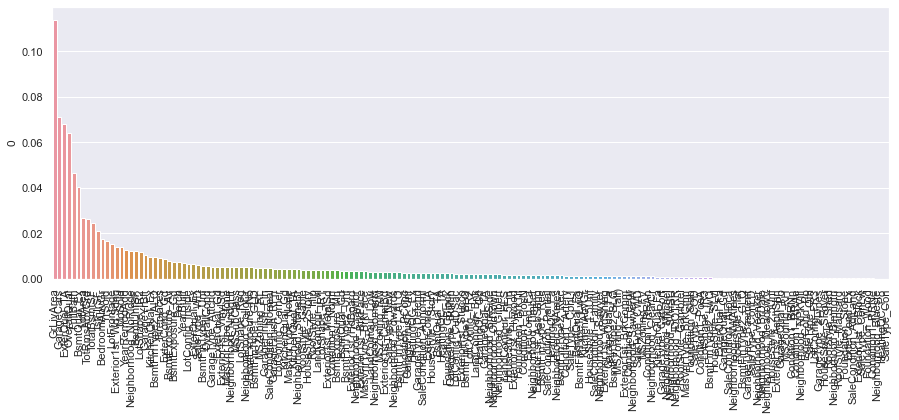

In [68]:
importancia_features = pd.DataFrame(modelo_et.feature_importances_, X_train.columns)
importancia_features = importancia_features.sort_values(by=0, ascending=False)
display(importancia_features)
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=importancia_features.index, y=importancia_features[0])
ax.tick_params(axis='x', rotation=90)

### Ajustando nossa base

In [69]:
importancia_features = importancia_features.reset_index()
importancia_features = importancia_features.rename(columns = {'index':'features', 0:'valores'})
importancia_features

,features,valores
0,GrLivArea,0.113949
1,GarageCars,0.071052
2,ExterQual_TA,0.068130
3,OverallQual,0.064162
4,FullBath,0.046565
5,BsmtQual_Ex,0.040151
6,LotArea,0.026664
7,TotRmsAbvGrd,0.026082
8,TotalBsmtSF,0.024432
9,1stFlrSF,0.020720


### Removendo todos os dados que possuirem relevância menor que 0.6% para o nosso modelo

In [70]:
importancia_features = importancia_features[importancia_features['valores'] > 0.006200]
importancia_features

,features,valores
0,GrLivArea,0.113949
1,GarageCars,0.071052
2,ExterQual_TA,0.068130
3,OverallQual,0.064162
4,FullBath,0.046565
5,BsmtQual_Ex,0.040151
6,LotArea,0.026664
7,TotRmsAbvGrd,0.026082
8,TotalBsmtSF,0.024432
9,1stFlrSF,0.020720


In [71]:
base_final = base_final[importancia_features['features'].values] 
base_final

,GrLivArea,GarageCars,ExterQual_TA,OverallQual,FullBath,BsmtQual_Ex,LotArea,TotRmsAbvGrd,TotalBsmtSF,1stFlrSF,BedroomAbvGr,YrSold,LotFrontage,Exterior1st_Wd Sdng,MoSold,YearRemodAdd,Neighborhood_NoRidge,BsmtUnfSF,LotShape_IR2,GarageYrBlt,KitchenQual_Ex,BsmtFinType2_ALQ,Fireplaces,ExterCond_Gd,BsmtExposure_Av,BsmtExposure_Gd,Porch,YearBuilt,LotConfig_Inside,ExterQual_Ex
0,1710,2,0,7,2,0,8450,8,856,856,3,2008,65,0,2,2003,0,150,0,2003,0,0,0,0,0,0,1,2003,1,0
1,1262,2,1,6,2,0,9600,6,1262,1262,3,2007,80,0,5,1976,0,284,0,1976,0,0,1,0,0,1,0,1976,0,0
2,1786,2,0,7,2,0,11250,6,920,920,3,2008,68,0,9,2002,0,434,0,2001,0,0,1,0,0,0,1,2001,1,0
3,1717,3,1,7,1,0,9550,7,756,961,3,2006,60,1,2,1970,0,540,0,1998,0,0,1,0,0,0,1,1915,0,0
4,2198,3,0,8,2,0,14260,9,1145,1145,4,2008,84,0,12,2000,1,490,0,2000,0,0,1,0,1,0,1,2000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1092,0,1,4,1,0,1936,5,546,546,3,2006,21,0,6,1970,0,546,0,0,0,0,0,0,0,0,0,1970,1,0
1455,1092,1,1,4,1,0,1894,6,546,546,3,2006,21,0,4,1970,0,294,0,1970,0,0,0,0,0,0,1,1970,1,0
1456,1224,2,1,5,1,0,20000,7,1224,1224,4,2006,160,0,9,1996,0,0,0,1960,0,0,1,0,0,0,0,1960,1,0
1457,970,0,1,5,1,0,10441,6,912,970,3,2006,62,0,7,1992,0,575,0,0,0,0,0,0,1,0,1,1992,1,0


# RODANDO NOVAMENTE NOSSOS MODELOS AGORA COM A NOVA BASE_FINAL UTILIZANDO SOMENTE AQUELE VALORES COM CORRELAÇÃO SUPERIOR A 0.6

In [98]:
X = base_final
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(X_train, y_train)
    #testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))

Modelo RandomForest:
R²:48.51%
RSME:43288.28
Modelo LinearRegression:
R²:44.25%
RSME:45039.68
Modelo ExtraTrees:
R²:42.61%
RSME:45698.65


In [73]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1454    167081
1455    164788
1456    219222
1457    184924
1458    187741
Name: SalePrice, Length: 2919, dtype: int64

In [74]:
#base_final['ExterQual_Ex','ExterQual_Gd','ExterCond_Gd','BsmtExposure_Gd','BsmtExposure_Av','BsmtFinType2_ALQ','KitchenQual_Ex','BsmtUnfSF','LotShape_IR2','Exterior1st_Wd Sdng','Neighborhood_NoRidge','BsmtQual_Ex','ExterQual_TA'].drop()

#base_final = base_final.drop(['ExterQual_Ex','ExterQual_Gd','ExterCond_Gd','BsmtExposure_Gd','BsmtExposure_Av','BsmtFinType2_ALQ','KitchenQual_Ex','BsmtUnfSF','LotShape_IR2','Exterior1st_Wd Sdng','Neighborhood_NoRidge','BsmtQual_Ex','ExterQual_TA'],axis=1)

base_final[importancia_features['features'].values[:6]]

,GrLivArea,GarageCars,ExterQual_TA,OverallQual,FullBath,BsmtQual_Ex
0,1710,2,0,7,2,0
1,1262,2,1,6,2,0
2,1786,2,0,7,2,0
3,1717,3,1,7,1,0
4,2198,3,0,8,2,0
...,...,...,...,...,...,...
1454,1092,0,1,4,1,0
1455,1092,1,1,4,1,0
1456,1224,2,1,5,1,0
1457,970,0,1,5,1,0


In [75]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

# for nome_modelo, modelo in modelos.items():
#     #treinar
#     modelo.fit(X_train, y_train)
#     #testar
#     previsao = modelo.predict(X_test)
#     print(avaliar_modelo(nome_modelo, y_test, previsao))

In [76]:
#base_final[importancia_features['features'].values[:6]]
#base_final

### Distribuição da área do lote (LotArea)
    
    Notamos que havia um desvio padrão muito grande para esse campo, que representa o tamanho do lote total (LotArea) veremos essa distribuição no dataset
    Analisando o gráfico abaixo podemos verificar que a maioria dos registros do dataset estão entre 0 e 21k, sendo que ele possui um desvio padrão alto, ou seja, a maior parte dos dados está concentrada em uma parte do gráfico ao invés de disperso ao longo dele.
    Um fator interessante do gráfico de distribuição é que ele não precisa de dois parâmetros, ele vê a quantidade de um parametro e quantas vezes ele aparece
    

In [77]:
#sns.displot(novo_train.LotArea)

#Tamanho do lote total = LotArea

### Analisando o gráfico abaixo
    
    Como o gráfico de dispersão ( sctterplot ) nos mostra que os dados acima de 50000 ft^2 são poucos, iremos ignorar valores acima deste valor, iremos fazer uma analise de threshold para saber valores exatos que podem ser analisados

In [78]:
#sns.scatterplot(novo_train.LotArea,novo_train.SalePrice)

### Criando um threshold para os percentis do gráfico de dispersão

In [79]:
#percentil_threshold = novo_train['LotArea'].quantile(q=[0.75, 0.80, 0.85, 0.90, 0.95])

#my_threshold_lotarea = percentil_threshold[0.90]
#my_threshold_lotarea


### Pegando somente os valores acima do threshold selecionado, Podemos Verificar que só são 146 valores acima do percentil de 90%, dos 1460 (como deveria ser, 10% de 1460), ou seja, e que o salto numérico entre os 90% para os demais percentis será muito danoso e causará erros de análise, logo serão removidos dos dados para os passos a seguir

In [80]:
#novo_train_lotarea = novo_train
#novo_train_lotarea[novo_train_lotarea['LotArea'] > my_threshold_lotarea]

###  Retirando os valores que não quero no dataframe

In [81]:
#percentil90_lotarea_df = novo_train_lotarea[novo_train_lotarea['LotArea'] <= my_threshold_lotarea]
#percentil90_lotarea_df

### Pegando apenas algumas colunas do percentil 90 para poder fazer um mapa de calor que seja possivel a leitura

In [82]:
#percentil90_lotarea_df1 = percentil90_lotarea_df[['LotArea','SalePrice'] ]
#percentil90_lotarea_df1

### Fazendo um mapa de calor do dataframe "percentil90" para demonstrar que um simples tratamento de dados fez com que  o Lot area pelo "SalePrice" saiu de 0.26 do arquivo original (train) e agora passa a ser 0.4

In [83]:
#sns.heatmap(data = percentil90_lotarea_df1.corr(), annot = True)

### Analisando o mapa de calor acima, podemos verificar que a correlação da área da piscina não influencia em nada com nenhum dos outros fatores ( este método utiliza a correlação de Pearson, ver mais em: https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson ), correlações entre 0 e 0.3 são despreziveis, 0.3 a 0.5 são fracas, ou seja, olhando para nosso mapa de calor, poderiamos desprezar a análise do BedroomAbvGrd, PoolArea e o LotArea ( como ja havia feito a analise do LotArea eu vou manter a baixo esse dado ). 

### Agora analisando o gráfico abaixo, podemos ver uma leve tendência à o aumento de área aumentar o valor da venda da casa, ainda temos que fazer análises mais densas para chegar a alguma conclusão.

### O nome dessa remoção de dados chama-se remoção de outliers

In [84]:
#sns.scatterplot(percentil90_lotarea_df.LotArea,percentil90_lotarea_df.SalePrice)

### Adicionando uma linha de tendência ao gráfico podemos notar que existe uma certa tendência ao aumento de preço com relação ao lote, veremos mais a fundo os próximos dados

In [85]:
#sns.regplot(x = 'LotArea', y = 'SalePrice', data = percentil90_lotarea_df, color = 'b', line_kws = {'color':'r'} )

In [86]:
#sns.pairplot(percentil90_lotarea_df)

### Agora iremos tratar os dados  do GrlivArea que é o que está construido acima do porão:
### Começando por um mapa de distribuição podemos verificar que o mesmo que aconteceu com o Lot Area se repete em que a maior parte dos dados se encontra com uma assimetria (obliquidade) positiva, ou seja, possui muitas casas sendo vendidas a valores baixos com pouquissimos dados relevantes a preços elevados

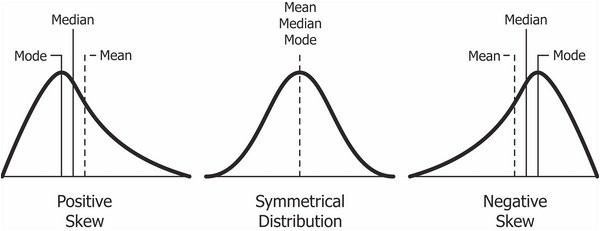

In [87]:
#sns.displot(novo_train.GrLivArea)

### Logo será necessário um pequeno tratamento de dados para aumentar a relevância desses dados (que já esta em 0.71 sem tratamento, mas será bom analisar com o mesmo parâmetro de percentil 90% que foi utilizado no LotArea)
### Verificando os percentis 0.7  até 0.95

In [88]:
#percentil_threshold_grlivarea = novo_train['GrLivArea'].quantile(q=[0.75, 0.80, 0.85, 0.90, 0.95])
#percentil_threshold_grlivarea

### separando um marcador do percentil 90

In [89]:
#my_threshold_grlivarea = percentil_threshold_grlivarea[0.90]
#my_threshold_grlivarea

### Criando um novo dataframe com apenas os dados percentil 90 do GrLivArea

In [90]:
#novo_train_grlivarea = novo_train
#percentil90_grlivarea_df = novo_train_grlivarea[novo_train_grlivarea['GrLivArea'] <= my_threshold_grlivarea]



### Criando um novo data frame percentil 90 do GRlivarea com menos dados para gerar um mapa de calor e verificar a correlacao


In [91]:
#percentil90_grlivarea_df1 = percentil90_grlivarea_df[['GrLivArea','SalePrice'] ]
#percentil90_grlivarea_df1

### Podemos notar que após o percentil 90 ser aplicado, a corelação entre GrLivArea e SalePrice diminuiu.

In [92]:
#percentil90_grlivarea_df1.corr()

### plot de dispersão antes do tratamento percentil 90

In [93]:
#sns.scatterplot(novo_train.GrLivArea,novo_train.SalePrice)

#Area construida = GrLivArea

### plot de dispersão depois do tratamento percentil 90

In [94]:
#sns.scatterplot(percentil90_grlivarea_df1.GrLivArea,percentil90_grlivarea_df1.SalePrice)

### Utilizando regrssão linear  para o percentil90 do GrLivArea

In [95]:
#sns.regplot(x = 'GrLivArea', y = 'SalePrice', data = percentil90_grlivarea_df1, color = 'b', line_kws = {'color':'r'})

### Utilizando regressão linear para o GrLivArea sem o tratamento de dados

In [96]:
#sns.regplot(x = 'GrLivArea', y = 'SalePrice', data = novo_train, color = 'b', line_kws = {'color':'r'})

### Com essa análise podemos verificar que nem sempre remover dados distoantes é bom para o aumento da correlação de um dado, cada caso deverá ser analisado isoladamente, um bom indicador para verificar se o dado precisa ser tratado é o desvio padrão, pois se ele for muito alto deverá haver dados que podem ser removidos sem maiores problemas, outro fator interessante para esta análise e verificar se os percentis avançam de forma linear ou de repente os números sobem de maneira estranha, isso pode indicar apenas dados pontuais que fazem essa quebra na linearidade, por fim é bom olhar se a mediana condiz com alguns valores de percentil e media, todos esses fatores farão com que a análise seja mais fluida e analises desnecessárias como o tratamento de dado do GrLivArea sejam descartadas logo de inicio.

### tendo em vista estes fatores, podemos afirmar que não existe necessidade de tratar pelo método mostrado neste projeto os outros dados, podemos assim voltar a analisar pelo coeficiente de pearson (corr) acima de 0.46 todos os dados anteriores

#### Lembrar de adicionar o LotArea modificado dentro do novo_train mesmo com colunas a menos e correlacionar e fazer um novo mapa somente com dados acima de 0.46

### Feature engineering : cria variaveis novas a partir das que ja existe, por exemplo transformar a correlação pool area de 0 = nao tem piscina e o que for diferente de 0 ser igual a ter piscina (1) e ai analisar a correlação entre ele e o SalePrice